In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [9]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000,n_features=2,n_clusters_per_class=2,n_classes=2,n_redundant=0,random_state=17)

<Axes: xlabel='0', ylabel='1'>

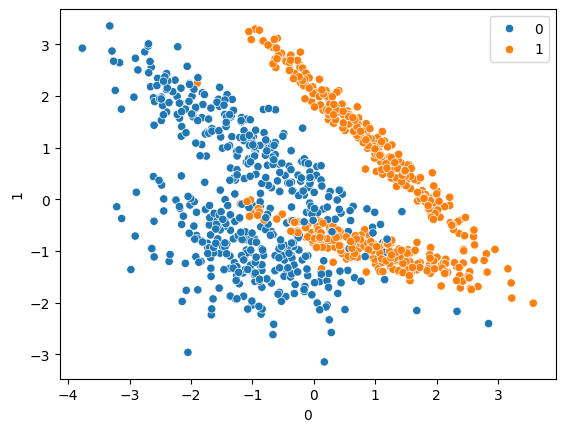

In [10]:
X=pd.DataFrame(X)

sns.scatterplot(x=X[0],y=X[1],hue=y)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=17)

### Linear Kernel

In [15]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       116
           1       0.90      0.92      0.91       134

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[102  14]
 [ 11 123]]


### RBF Kernel

In [25]:
from sklearn.svm import SVC
rbf = SVC(kernel='rbf')
rbf.fit(X_train,y_train)
y_pred = rbf.predict(X_test)

In [27]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.932
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       118
           1       0.92      0.95      0.94       132

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

[[107  11]
 [  6 126]]


### Polynomial Kernel

In [ ]:
from sklearn.svm import SVC
poly = SVC(kernel='poly')
poly.fit(X_train,y_train)
y_pred = poly.predict(X_test)

In [30]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.864
              precision    recall  f1-score   support

           0       0.96      0.79      0.86       137
           1       0.79      0.96      0.86       113

    accuracy                           0.86       250
   macro avg       0.87      0.87      0.86       250
weighted avg       0.88      0.86      0.86       250

[[108  29]
 [  5 108]]


### Sigmoid Kernel

In [31]:
from sklearn.svm import SVC
sig = SVC(kernel='sigmoid')
sig.fit(X_train,y_train)
y_pred = sig.predict(X_test)

In [32]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.776
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       119
           1       0.77      0.81      0.79       131

    accuracy                           0.78       250
   macro avg       0.78      0.77      0.77       250
weighted avg       0.78      0.78      0.78       250

[[ 88  31]
 [ 25 106]]


### Hypermetric Tuning

In [36]:
from sklearn.model_selection import GridSearchCV
params = {
    'C':[0.1,1,10,100,1000],
    'gamma' : [1,0.1,0.01,0.001,0.0001],
    'kernel' : ['rbf','poly','sigmoid','linear']
}

In [37]:
grid = GridSearchCV(SVC(),param_grid=params,refit=True,cv=5,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.947 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.920 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.907 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.880 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.867 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.787 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoi

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=3)

In [38]:
grid.best_score_,grid.best_params_

(np.float64(0.9613333333333334), {'C': 10, 'gamma': 1, 'kernel': 'rbf'})

In [39]:
y_pred = grid.predict(X_test)

In [40]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.952
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       111
           1       0.96      0.95      0.96       139

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

[[106   5]
 [  7 132]]
